#KNeighborsRegressor - Bike Sharing

### Introducing the exercise

This exercise uses the **bike sharing** dataset. The function of all features as well as the target is described in the **Readme.txt** file. The goal is to predict the count of total rental bikes using KNN's regressor and the OLS linear regression implemented in sklearn.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression

The code implemented below reads the **day.csv** file located in the **bike-sharing-dataset** folder and stores the data in a **pandas** DataFrame. Some of the columns are omitted. The goal of predicting the count can be achieved by following the steps below.

* One of the OLS assumptions is that each feature bears a linear dependency with the target. To check whether this condition is satisfied, create separate plots of **cnt** versus each of the six features. Choose two that bear a linear, or close to linear, dependency with the target.
* Let these two features be the inputs and **cnt** be the target.
* Create an 80:20 train-test split.
* Having the features scaled is an essential part of working with the KNN algorithm. Make sure that the two features are scaled properly. You can use sklearn's StandardScaler() class.
* Create instances of the KNeighborsRegressor and LinearRegression classes. For the KNeighborsRegressor model, try to find the number of neighbors that works best.
* Fit the model to the training data.
* Make predictions on the test data.
* For each of the models, make a plot of the true test values versus the predicted test values. A perfect model would draw a 45-degree line. On both figures, plot a 45-degree line for a reference.
* Return the R-squared value for both models. You can find out how to do that on the pages of the two regression algorithms. What is the R-squared value of a perfect model? Based on that, which of the two models performed better?

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler

Have fun!

### Import the relevant libraries

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Day Data

### Load the dataset and displaying the inputs

In [2]:
data = pd.read_csv('day.csv').drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday'], axis = 1)

In [3]:
data

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Identify the features that bear a linear relation with the target

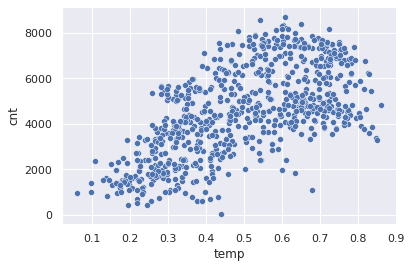

In [4]:
sns.set()

sns.scatterplot(data = data, x = 'temp', y = 'cnt');

### Based on the results from above, define the inputs and the target. Create a train-test split

In [5]:
inputs = data[['casual', 'registered']]
target = data['cnt']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

### Scale the training and test data to zero mean and unit variance

In [7]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Create the KNN and Linear regression models. Make predictions on the test data

In [8]:
reg_knn = KNeighborsRegressor(n_neighbors = 2)
reg_knn.fit(x_train_scaled, y_train)
y_test_pred_knn = reg_knn.predict(x_test_scaled)

In [9]:
reg_lin = LinearRegression()
reg_lin.fit(x_train_scaled, y_train)
y_test_pred_lin = reg_lin.predict(x_test_scaled)

### Plot the predicted values from both models versus the true values

In [10]:
x = [50, 8000]
y = [50, 8000]

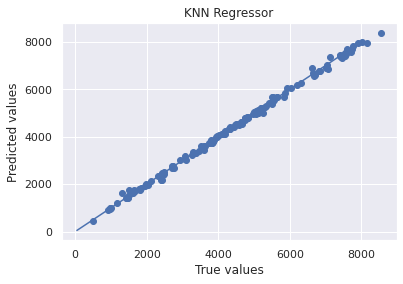

In [11]:
sns.set()

plt.scatter(y_test, y_test_pred_knn)
plt.plot(x, y)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('KNN Regressor');

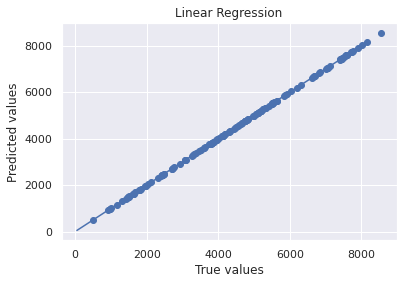

In [12]:
sns.set()

plt.scatter(y_test, y_test_pred_lin)
plt.plot(x, y);
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Linear Regression');

### Calculate the R2 value for both models

In [13]:
reg_knn.score(x_test_scaled, y_test), reg_lin.score(x_test_scaled, y_test)

(0.9979433147107003, 1.0)

## Hour Data

### Load the dataset and displaying the inputs

In [14]:
data = pd.read_csv('hour.csv').drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday'], axis = 1)

In [15]:
data

,hr,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2,0.22,0.2727,0.80,0.0000,5,27,32
3,3,0.24,0.2879,0.75,0.0000,3,10,13
4,4,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...
17374,19,0.26,0.2576,0.60,0.1642,11,108,119
17375,20,0.26,0.2576,0.60,0.1642,8,81,89
17376,21,0.26,0.2576,0.60,0.1642,7,83,90
17377,22,0.26,0.2727,0.56,0.1343,13,48,61


### Identify the features that bear a linear relation with the target

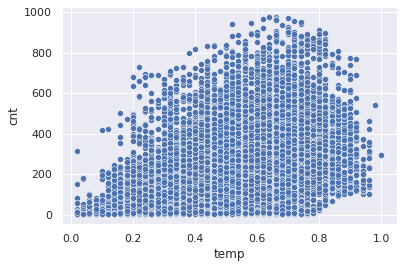

In [16]:
sns.set()

sns.scatterplot(data = data, x = 'temp', y = 'cnt');

### Based on the results from above, define the inputs and the target. Create a train-test split

In [17]:
inputs = data[['casual', 'registered']]
target = data['cnt']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

### Scale the training and test data to zero mean and unit variance

In [19]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Create the KNN and Linear regression models. Make predictions on the test data

In [20]:
reg_knn = KNeighborsRegressor(n_neighbors = 2)
reg_knn.fit(x_train_scaled, y_train)
y_test_pred_knn = reg_knn.predict(x_test_scaled)

In [21]:
reg_lin = LinearRegression()
reg_lin.fit(x_train_scaled, y_train)
y_test_pred_lin = reg_lin.predict(x_test_scaled)

### Plot the predicted values from both models versus the true values

In [22]:
x = [50, 8000]
y = [50, 8000]

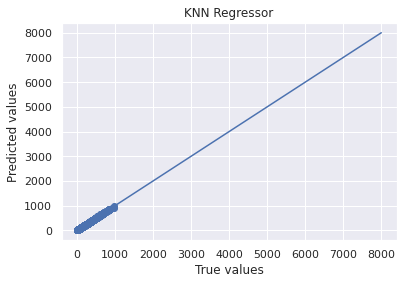

In [23]:
sns.set()

plt.scatter(y_test, y_test_pred_knn)
plt.plot(x, y)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('KNN Regressor');

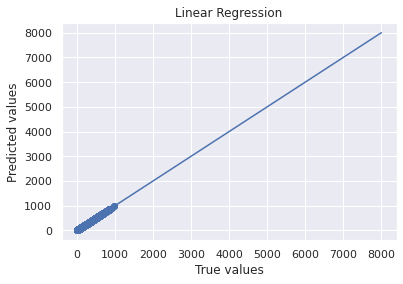

In [24]:
sns.set()

plt.scatter(y_test, y_test_pred_lin)
plt.plot(x, y);
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Linear Regression');

### Calculate the R2 value for both models

In [25]:
reg_knn.score(x_test_scaled, y_test), reg_lin.score(x_test_scaled, y_test)

(0.9997589433656945, 1.0)